In [ ]:
#To import pymongo library to export preprocessed dataset to MongoDB local instance
!pip install pymongo

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pymongo import MongoClient
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('vehicles_dataset.csv')

In [5]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [6]:
df.shape

(1002, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   type            1002 non-null   object 
 5   year            1002 non-null   int64  
 6   price           979 non-null    float64
 7   engine          1000 non-null   object 
 8   cylinders       897 non-null    float64
 9   fuel            995 non-null    object 
 10  mileage         968 non-null    float64
 11  transmission    1000 non-null   object 
 12  trim            1001 non-null   object 
 13  body            999 non-null    object 
 14  doors           995 non-null    float64
 15  exterior_color  997 non-null    object 
 16  interior_color  964 non-null    object 
 17  drivetrain      1002 non-null   o

In [8]:
#Checking for numeric column types in the df
df.select_dtypes(include='number').columns.tolist()

['year', 'price', 'cylinders', 'mileage', 'doors']

In [9]:
#Identifying count of distinct data for each attribute
df.nunique() 

name              358
description       761
make               28
model             153
type                1
year                3
price             859
engine            100
cylinders           5
fuel                7
mileage            95
transmission       38
trim              197
body                8
doors               4
exterior_color    263
interior_color     91
drivetrain          4
dtype: int64

In [10]:
#To check for null data in the dataset
df.isnull().any() 

name              False
description        True
make              False
model             False
type              False
year              False
price              True
engine             True
cylinders          True
fuel               True
mileage            True
transmission       True
trim               True
body               True
doors              True
exterior_color     True
interior_color     True
drivetrain        False
dtype: bool

In [11]:
#Count the no. of null values in the columns
df.isna().sum()

name                0
description        56
make                0
model               0
type                0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

**HANDLING MISSING/NULL VALUES**-

As we observed above, there is missing data in our dataset, so we need to handle that in the data.
Removing the null values is not a good idea as it can lead to loss of valuable information from the dataset.
So here will be imputing the missing/null integer values by the Median imputation technique. Median imputation is a method used to handle missing values in a dataset by replacing them with the median value of the column where the missing value occurs.
By this, we will retain all the observations in the dataset and median imputation will also help to preserve the central tendency of the data without being influenced by extreme values.

In [12]:
#Data Pre-processing
#Filling numerical null values by median imputation

price_med = df['price'].median()
df['price'].fillna(price_med,inplace =True)

cylinders_med = df['cylinders'].median()
df['cylinders'].fillna(cylinders_med,inplace =True)

mileage_med = df['mileage'].median()
df['mileage'].fillna(mileage_med,inplace =True)

doors_med = df['doors'].median()
df['doors'].fillna(doors_med,inplace =True)

In [13]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


**HANDLING MISSING/NULL STRING VALUES**-

There is missing string data in our dataset, so we need to handle that in the data as well. Removing the null values is not a good idea as it can lead to loss of valuable information from the dataset. So here will be imputing the missing/null string values by the mode imputation technique. 
Mode imputation is a technique used to handle missing data in a dataset. It involves replacing missing values with the most frequent value (mode) in a particular column. This method is particularly useful for categorical data where the most common category can serve as a reasonable estimate for missing entries.

In [14]:
#Imputing missing values in string columns with the most frequently occuring value
fuel_impute = df['fuel'].mode()[0]
df['fuel'].fillna(fuel_impute, inplace=True)

body_impute = df['body'].mode()[0]
df['body'].fillna(body_impute,inplace =True)

trim_impute = df['trim'].mode()[0]
df['trim'].fillna(trim_impute,inplace =True)

eng_impute = df['engine'].mode()[0]
df['engine'].fillna(eng_impute,inplace =True)

exterior_color_impute = df['exterior_color'].mode()[0]
df['exterior_color'].fillna(exterior_color_impute,inplace =True)

interior_color_impute = df['interior_color'].mode()[0]
df['interior_color'].fillna(interior_color_impute,inplace =True)

transmission_impute = df['transmission'].mode()[0]
df['transmission'].fillna(transmission_impute,inplace =True)


In [15]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [16]:
#For rows where description is missing, added 'Unknown' value in the column
df['description'].fillna('Unknown',inplace =True)

In [17]:
df.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,Unknown,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [18]:
df.isna().sum()

name              0
description       0
make              0
model             0
type              0
year              0
price             0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64

In [19]:
#Checking for duplicate rows across all columns
duplicate_rows = df.duplicated()

#Count the number of duplicate rows
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

24

**DUPLICATE RECORDS** -
There are 24 rows in the dataset that have duplicate records, hence we need to handle them.
Duplicate rows can lead to inaccuracies in analysis and modeling and can hence create inconsistencies in the dataset, making it harder to interpret and analyze.
Removing these duplicates helps maintain data integrity and consistency. However, since the number of duplicate rows is more, rather than removing them, we will retain only first instance of these duplicate rows to avoid loss of information.

In [20]:
#Keeping only the first instance of the duplicate rows
df_new = df.drop_duplicates(keep='first')

In [21]:
df_new.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,Unknown,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [22]:
duplicate_rows = df_new.duplicated()
#Count the number of duplicate rows after removing the duplicates
num_duplicate_rows = duplicate_rows.sum()
num_duplicate_rows

0

In [23]:
#dataframe without duplicates
df_new.shape

(978, 18)

In [26]:
# Function to remove escape sequences, if any in the dataframe.Since there are escape sequences in the Description column,we need to handle them 

def remove_escape_sequences(df_new):
    for column in df_new.columns:
        if df_new[column].dtype == 'object':
            df_new[column] = df_new[column].str.replace(r'[\n\t\r]', '', regex=True)
    return df_new


In [27]:
# Remove escape sequences from all string type columns
vehicle_data = remove_escape_sequences(df_new)
# Display the first few rows to verify the changes
vehicle_data.head()

,name,description,make,model,type,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"Heated Leather Seats, Nav System...",Jeep,Wagoneer,New,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,New,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,Unknown,GMC,Yukon XL,New,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,New,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,2024 Ram 3500 Laramie Billet Sil...,RAM,3500,New,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [28]:
#statistical information of the above dataset
vehicle_data.describe()

,year,price,cylinders,mileage,doors
count,978.000000,978.000000,978.000000,978.000000,978.000000
mean,2023.922290,50240.902863,4.860941,68.319018,3.942740
std,0.289874,18578.913580,1.338007,504.876134,0.276684
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,37101.250000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58851.250000,6.000000,12.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


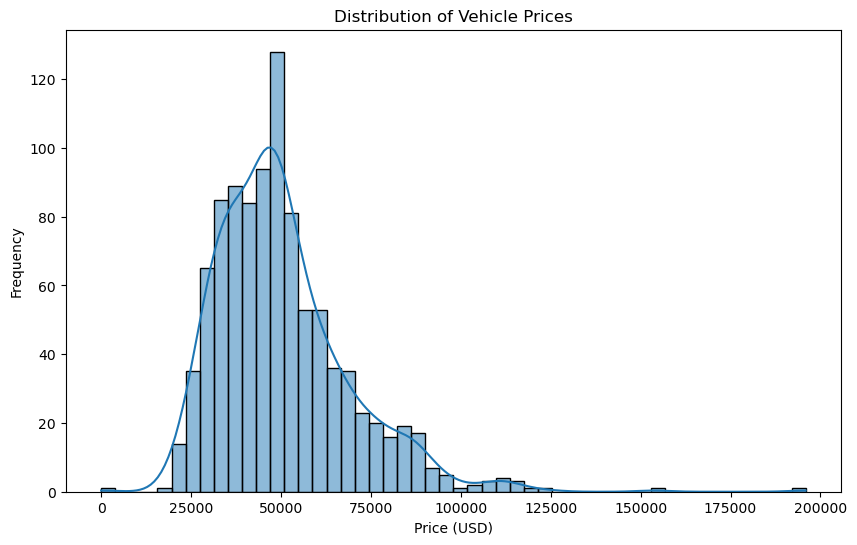

In [29]:
# Visualize the distribution of vehicle price
plt.figure(figsize=(10, 6))
sns.histplot(vehicle_data['price'], bins=50, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

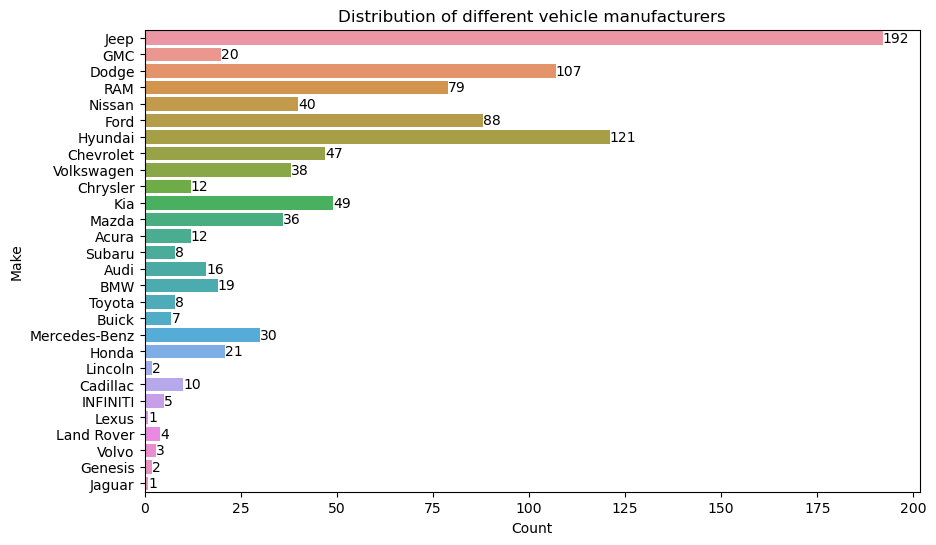

In [30]:
# Analyzing the distribution of different manufacturers
plt.figure(figsize=(10, 6))
bx = sns.countplot(y='make', data=vehicle_data)
for label in bx.containers:
    bx.bar_label(label)
plt.title('Distribution of different vehicle manufacturers')
plt.xlabel('Count')
plt.ylabel('Make')
plt.show()

In [31]:
# Create a DataFrame from the dictionary
# Specify the desired columns to export-added cols-mileage,doors,exterior_color,interior_color,fuel as they are needed for the queries to run on the schema
selected_columns = ['name','description','make','model','type','year','price','engine',
                    'cylinders','mileage','doors','exterior_color','interior_color',
                    'fuel','body']

# Save only the selected columns to 'data_filtered.csv'
vehicle_data[selected_columns].to_csv('data_filtered.csv', index=False)


In [34]:
#Code to export filtered(cleaned) data to MongoDB
vehicle_data_mongo = vehicle_data[selected_columns]
df = pd.DataFrame(vehicle_data_mongo)
# MongoDB connection details 
client = MongoClient("mongodb://localhost:27017/")  
db = client["local"]  
collection_name = "vehicle_dataset"  

# Convert DataFrame to a list of dictionaries 
data_records = df.to_dict(orient='records')

# Insert data into MongoDB collection
collection = db[collection_name]
collection.insert_many(data_records)
print("Data successfully populated to MongoDB!")

Data successfully populated to MongoDB!
